In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matplotlib inline

# Load data

In [3]:
import pickle

In [4]:
mat = np.load('barcode_counts.npy')

In [5]:
prot_len = mat.shape[0]

In [6]:
with open('aas_ordered.pkl', 'rb') as fobj:
    aas_ordered = pickle.load(fobj)

In [7]:
# Single-character labels for all AAs (sub * for STOP)
aa_labels = np.asarray(['*'] + aas_ordered[1:])

In [8]:
with open('wt_seq.txt') as fobj:
    wt_seq = fobj.read()

In [9]:
wt_seq_stop = wt_seq + '*'

# Heatmap

In [10]:
# Color map to use - color entries under vmin white
cmap = plt.cm.magma
cmap.set_under('white')

In [11]:
# Keyword args to imshow to display a matrix
img_mat_args = dict(interpolation='nearest', origin='upper', aspect='equal')

In [12]:
# Sort by most barcodes to least
aa_count_sort = np.argsort(mat.sum(axis=0))[::-1]

aa_labels_sort = aa_labels[aa_count_sort]
mat_sort = mat[:, aa_count_sort]

In [13]:
aa_ticks = np.arange(21)

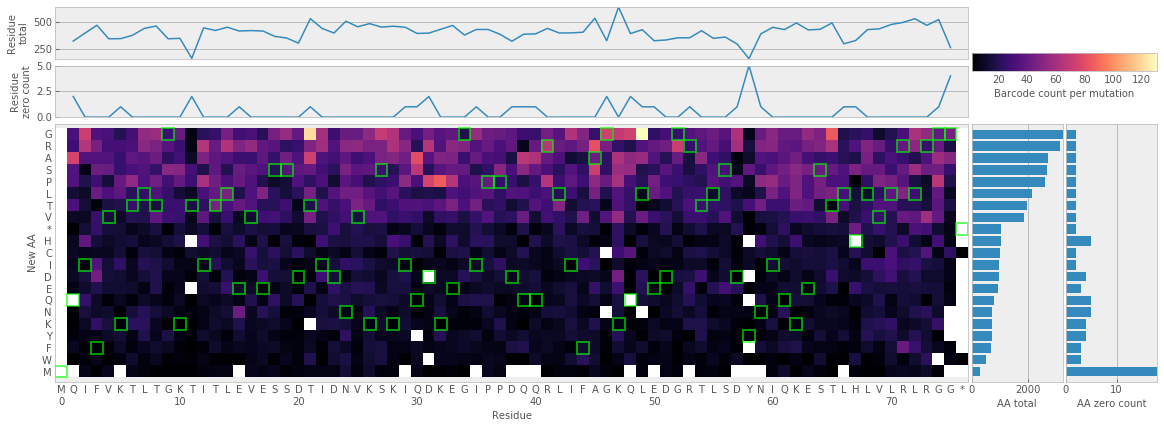

In [14]:
# Create figure and grid
fig = plt.figure(figsize=(16, 5.75))
gs = plt.GridSpec(3, 3, width_ratios=[1, .1, .1], height_ratios=[.2, .2, 1])

# Create subplots
hm_ax = plt.subplot(gs[2, 0], aspect='equal')

res_total_ax, res_zero_ax = [plt.subplot(gs[i, 0], sharex=hm_ax) for i in [0, 1]]
aa_total_ax, aa_zero_ax = [plt.subplot(gs[2, i], sharey=hm_ax) for i in [1, 2]]

# Plot heatmap
img = hm_ax.imshow(mat_sort.T, cmap=cmap, vmin=1, **img_mat_args)
hm_ax.grid(b=False)

# Synonymous mutations
from matplotlib.patches import Rectangle
for i, aa in enumerate(wt_seq + '*'):
    j = list(aa_labels_sort).index(aa)
    hm_ax.add_artist(Rectangle((i - .5, j - .5), 1, 1, fill=False, edgecolor='#00FF0099', lw=2))

# Heatmap Y axis
hm_ax.set_ylabel('New AA')
hm_ax.set_yticks(aa_ticks)
hm_ax.set_yticklabels(aa_labels_sort)

# Heatmap X axis
hm_ax.set_xlabel('Residue')
hm_ax.xaxis.tick_bottom()

# Protein sequence in minor x ticks
hm_ax.set_xticks(range(prot_len), minor=True)
hm_ax.set_xticklabels(wt_seq + '*', minor=True)

# Protein residue numbers in major x ticks
# Automatic settings good, just move under minor labels
hm_ax.tick_params(axis='x', which='major', pad=15)

# No heatmap ticks
hm_ax.tick_params(axis='both', which='both', bottom='off', left='off')

# Plot residue barcode totals
res_total_ax.plot(np.arange(1, prot_len - 1), np.sum(mat_sort[1:-1], axis=1))
res_total_ax.set_ylabel('Residue\ntotal')

# Plot residue zero totals
res_zero_ax.plot(np.arange(1, prot_len - 1), np.sum(mat_sort[1:-1] == 0, axis=1))
res_zero_ax.set_ylabel('Residue\nzero count')

# Residue subplot axes
for ax in [res_total_ax, res_zero_ax]:
    ax.xaxis.set_visible(False)
    ax.autoscale(None, axis='y', tight=True)

# Plot AA barcode totals
aa_total_ax.barh(range(21), np.sum(mat_sort, axis=0))
aa_total_ax.set_xlabel('AA total')

# Plot AA zero totals
aa_zero_ax.barh(range(21), np.sum(mat_sort == 0, axis=0))
aa_zero_ax.set_xlabel('AA zero count')

# AA subplot axes
for ax in [aa_total_ax, aa_zero_ax]:
    ax.yaxis.set_visible(False)
    ax.autoscale(None, axis='x', tight=True)

# Fit subplots tightly to data
plt.tight_layout(w_pad=0, pad=0)

for ax in [hm_ax, res_total_ax, res_zero_ax, aa_total_ax, aa_zero_ax]:
    ax.autoscale(tight=True)

# Color bar
cbar_ax = plt.subplot(gs[:2, 1:], aspect=.1)
cbar = plt.colorbar(img, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Barcode count per mutation')

pass